# IBM Developer Skills Network

# Linear Regression 1D Training One Parameter

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.detach().numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

# Make some Data

In [23]:
import torch

In [24]:
# Create f(X) with slope of -3
X = torch.arange(-3, 3, 0.1).view(-1, 1)  # tensor dimension up 
f = -3 * X
f.shape

torch.Size([60, 1])

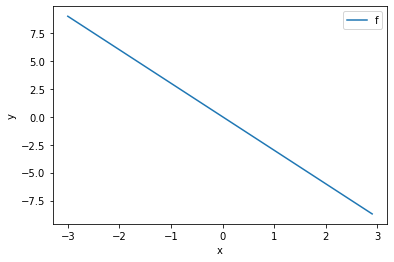

In [25]:
# Plot the line
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [26]:
# Add some noise to the data
Y = f + 0.1 * torch.randn(X.size())

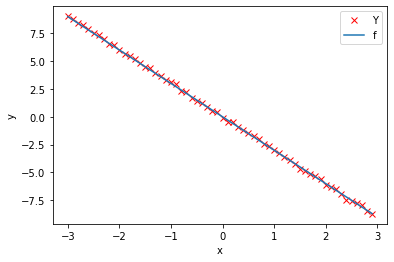

In [27]:
# Plot the data points

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Create the Model and Cost Function (Total Loss)

In [28]:
# Create forward function for prediction
def forward(x):
    return w*x

In [29]:
# Create the mean square error function
def criterion(yhat, y):
    return torch.mean((yhat-y)**2)

In [30]:
# Define the learning rate
lr = 0.1
LOSS = []

In [12]:
w = torch.tensor(-10.0, requires_grad = True)

In [31]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

# Train the model

In [34]:
# Define a function to train
def train_model(iter):
    for epoch in range(iter):
        # make prediction
        Yhat = forward(X)

        # Calculate loss
        loss = criterion(Yhat, Y)

        # Plot the diagram
       # gradient_plot(Yhat, w, loss.item(), epoch)

        # Store the loss to list
        LOSS.append(loss.item())

        # compute gradient of the loss with respect to all the learnable parameters
        loss.backward()

        # Update parameters
        w.data = w.data - lr * w.grad.data

        # zero the gradient
        w.grad.data.zero_()

In [35]:
# Run 4 iterations
train_model(4)

Text(23.875, 0.5, 'Cost')

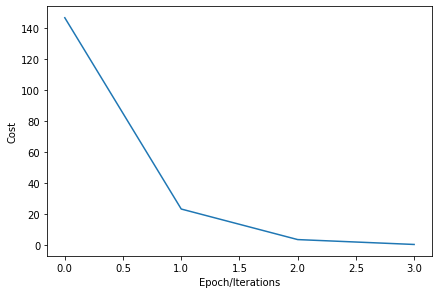

In [36]:
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")